## Initial setup

In [18]:
import Drone
from configurations import defaultConfig 
import numpy as np
from ConvexMotionPlanning import TrajGen 
from plottingFunctions import state_plots_command


In [19]:
# Drone instantiation
config = defaultConfig()
config.numObstacles = 4
drone = Drone.Drone(config, config)

# Parameters
thrustCommandVal = 4.4
refStates = drone.coherentCommand(thrustCommandVal,0/180*np.pi)
controlRef = (thrustCommandVal, drone.elevatorFromAlpha(refStates[1]-refStates[3]))
iterations = 2000
iter = 0
pathDist = 100
stateRef = np.hstack(([0,50], refStates))
drone.reset(stateRef)

# Data
traj = np.zeros((7,iterations))
elvActual = np.zeros(iterations)
thrustCommand = np.zeros(iterations)+thrustCommandVal
stateCommand = drone.coherentCommand(thrustCommand[0],0/180*np.pi)
elivCommandRef = drone.elevatorFromAlpha(stateCommand[1]-stateCommand[3])
elivCommand = np.zeros(iterations) + elivCommandRef
xCommand = np.zeros(iterations)
yCommand = np.zeros(iterations)
refCommand = np.zeros((iterations, 4))
refCommand[0] = refStates

# Main loop
for iter in range(0, iterations):
    action = [thrustCommand[iter], elivCommand[iter], refCommand[iter, :]] 
    observation, grid, reward, terminated = drone.step(action)
    traj[:,iter] = np.hstack((drone.plant.state,drone.plant.time))
    elvActual[iter] = drone.delta_e_actual
    if(iter%pathDist == 0):
        thrustCommand, elivCommand, xCommand, yCommand, refCommand = TrajGen(drone, grid, thrustCommand, elivCommand, xCommand, yCommand, refStates, refCommand, thrustCommandVal,elivCommandRef, iterations, iter)


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


     pcost       dcost       gap    pres   dres
 0:  2.9096e+03 -2.4927e+05  3e+05  8e-02  5e+02
 1:  9.1026e+02 -8.6114e+04  9e+04  2e-02  1e+02
 2:  1.0089e+03 -8.3827e+04  9e+04  2e-02  1e+02
 3:  9.7644e+02 -5.9940e+04  6e+04  1e-02  7e+01
 4:  1.5063e+03 -3.4783e+04  4e+04  4e-04  3e+00
 5:  1.2609e+03 -3.1659e+03  4e+03  5e-05  3e-01
 6:  1.2391e+03  1.1754e+03  6e+01  7e-07  4e-03
 7:  1.2389e+03  1.2382e+03  6e-01  7e-09  4e-05
 8:  1.2389e+03  1.2389e+03  6e-03  7e-11  4e-07
 9:  1.2389e+03  1.2389e+03  6e-05  7e-13  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3294e+03 -2.5218e+05  3e+05  6e-02  1e+02
 1:  6.7614e+02 -2.7445e+04  3e+04  5e-03  1e+01
 2:  9.0426e+02 -2.6479e+04  3e+04  5e-03  9e+00
 3:  7.1588e+02 -1.1135e+04  1e+04  7e-04  1e+00
 4:  7.1577e+02  5.0300e+02  2e+02  7e-06  1e-02
 5:  7.1570e+02  7.1357e+02  2e+00  7e-08  1e-04
 6:  7.1570e+02  7.1568e+02  2e-02  7e-10  1e-06
 7:  7.1570e+02  7.1570e+02  2e-04  7e-12  1e-0

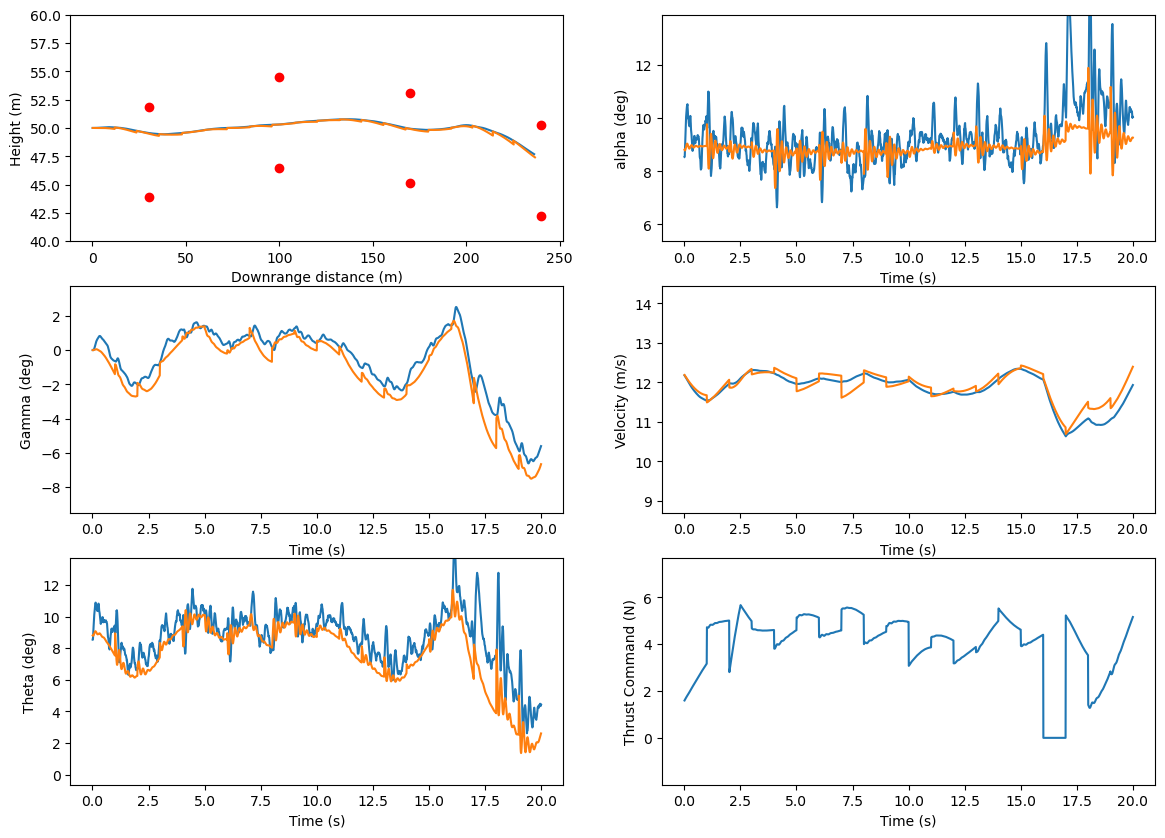

In [20]:
import importlib
import plottingFunctions
importlib.reload(plottingFunctions)
plottingFunctions.state_plots_command(traj,thrustCommand,xCommand, yCommand, elivCommand,elvActual, refCommand, drone)